# text embeddings on S&P 500 news

SentenceTransformer is a library that uses models like BERT or its variants to convert text into a vector that can vary its lenght, the more lenght the more information each embedding will contain, this information captures semantic meaning, context, syntax and relationships.

In [2]:
#Import required libraries
#Web and managing data
import yfinance as yf
import requests
from io import StringIO
from concurrent.futures import ThreadPoolExecutor, as_completed
#Data and Viz
import pandas as pd
import matplotlib.pyplot as plt
#Transformer
from sentence_transformers import SentenceTransformer
#Evaluation and metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
#Download the data for S&P_500
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
html = StringIO(response.text)

tables = pd.read_html(html)

# The S&P 500 constituents table is the FIRST real table, usually index 1
df_tickers = tables[1]

df_tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
#YFinance lib prefers - over . on symbols
ticker_list = df_tickers['Symbol'].str.replace('.', '-', regex=False).tolist()

# Getting the news for each ticker in the S&P 500

In [5]:
def fetch_news(ticker):
    try:
        return ticker, yf.Ticker(ticker).news
    except:
        return ticker, None

def batch_fetch_news(tickers, max_workers=20, top_n=3):
    news_dict = {}

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(fetch_news, t): t for t in tickers}

        for future in as_completed(futures):
            ticker, news = future.result()

            if isinstance(news, list):
                news_dict[ticker] = news[:top_n]
            else:
                news_dict[ticker] = None

    return news_dict

In [6]:
# Download the news
news_dict = batch_fetch_news(ticker_list, max_workers=5, top_n=5)
# Clean the dictionary before processing
news_dict = {k: v for k, v in news_dict.items() if isinstance(v, list) and v}

In [7]:
news_dict.keys()

dict_keys(['ACN', 'AOS', 'MMM', 'ABT', 'ABBV', 'ADBE', 'AES', 'AMD', 'AFL', 'A', 'ABNB', 'APD', 'ALB', 'AKAM', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'AMZN', 'AEE', 'AMCR', 'MO', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'AWK', 'AMGN', 'AME', 'APH', 'ADI', 'AAPL', 'APA', 'APO', 'AON', 'AMAT', 'APP', 'APTV', 'ADM', 'ANET', 'ACGL', 'AIZ', 'AJG', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAX', 'BAC', 'BDX', 'BBY', 'BRK-B', 'TECH', 'BLK', 'BX', 'XYZ', 'BIIB', 'BK', 'BKNG', 'BSX', 'BA', 'BMY', 'AVGO', 'BRO', 'BF-B', 'BR', 'BLDR', 'BG', 'BXP', 'CPT', 'CHRW', 'CDNS', 'CPB', 'COF', 'CAH', 'CARR', 'CAT', 'CCL', 'COR', 'CDW', 'CBRE', 'CBOE', 'CNC', 'CF', 'CNP', 'SCHW', 'CRL', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CTAS', 'CINF', 'CI', 'CSCO', 'C', 'CFG', 'CLX', 'CMS', 'CME', 'KO', 'CTSH', 'COIN', 'CL', 'CMCSA', 'CAG', 'ED', 'COP', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'COST', 'CSGP', 'CTRA', 'CTVA', 'CRWD', 'CSX', 'CCI', 'CMI', 'CVS', 'DHR', 'DDOG', 'DRI'

In [8]:
# see the content for a ticker
news_dict['META']

[{'id': '51b0a638-e6d1-4f1f-8b32-e5447ba6c70f',
  'content': {'id': '51b0a638-e6d1-4f1f-8b32-e5447ba6c70f',
   'contentType': 'STORY',
   'title': "Nvidia says it isn't using 'circular financing' schemes. 2 famous short sellers disagree.",
   'description': '',
   'summary': 'Jim Chanos and Michael Burry claim Nvidia is engaged in questionable vendor financing.',
   'pubDate': '2025-11-26T10:00:21Z',
   'displayTime': '2025-11-27T06:32:59Z',
   'isHosted': True,
   'bypassModal': False,
   'previewUrl': None,
   'thumbnail': {'originalUrl': 'https://s.yimg.com/os/creatr-uploaded-images/2025-07/ed9399f0-5840-11f0-bb6b-04ccd545a9b6',
    'originalWidth': 5155,
    'originalHeight': 3437,
    'caption': '',
    'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/i8NM3hcO2fpxZN.ru5Pg3w--~B/aD0zNDM3O3c9NTE1NTthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2025-07/ed9399f0-5840-11f0-bb6b-04ccd545a9b6',
      'width': 5155,
      'height': 3437,
      'tag': 'origin

# Structuring the news into a pandas dataframe

Final dataframe should have the following columns given from the yfinance download:
TICKER
TITLE (of the news)
SUMMARY (of the news)
PUBLICATION_DATE (of the news)
URL (of the news)

In [9]:
#import datetime for formating
from datetime import datetime

#list to store rows
rows = []

for ticker, news_list in news_dict.items():
    for news in news_list:
        content = news.get('content')
        if content:  # Make sure content is not None
            try:
                rows.append({
                    'TICKER': ticker,
                    'TITLE': content.get('title'),
                    'SUMMARY': content.get('summary', ''),
                    'PUBLICATION_DATE': datetime.fromisoformat(content['pubDate'].replace('Z', '')) if 'pubDate' in content else None,
                    'URL': content.get('clickThroughUrl', {}).get('url')
                })
            except Exception as e:
                print(f"Skipping malformed news for {ticker}: {e}")

Skipping malformed news for ABBV: 'NoneType' object has no attribute 'get'
Skipping malformed news for ADBE: 'NoneType' object has no attribute 'get'
Skipping malformed news for A: 'NoneType' object has no attribute 'get'
Skipping malformed news for ALB: 'NoneType' object has no attribute 'get'
Skipping malformed news for AKAM: 'NoneType' object has no attribute 'get'
Skipping malformed news for AIG: 'NoneType' object has no attribute 'get'
Skipping malformed news for APA: 'NoneType' object has no attribute 'get'
Skipping malformed news for APA: 'NoneType' object has no attribute 'get'
Skipping malformed news for ACGL: 'NoneType' object has no attribute 'get'
Skipping malformed news for ADSK: 'NoneType' object has no attribute 'get'
Skipping malformed news for BKR: 'NoneType' object has no attribute 'get'
Skipping malformed news for BRK-B: 'NoneType' object has no attribute 'get'
Skipping malformed news for BIIB: 'NoneType' object has no attribute 'get'
Skipping malformed news for BIIB

In [11]:
#Merging rows into a dataframe
df_news = pd.DataFrame(rows)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TICKER            1742 non-null   object        
 1   TITLE             1742 non-null   object        
 2   SUMMARY           1742 non-null   object        
 3   PUBLICATION_DATE  1742 non-null   datetime64[ns]
 4   URL               1742 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 68.2+ KB


In [12]:
# Missed some tickers due to broken news or not being able to download
len(df_news['TICKER'].unique())

364

# Exploring text embeddings

- Using the open-source model: 'sentence-transformers/all-MiniLM-L6-v2' to create embeddings on the news title and summary
- Combining the title and summary into one string to embed together

In [13]:
# Load model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

c:\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\giank\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP downloa

In [14]:
# Prepare combined text for embedding
combined_text = (df_news['TITLE'] + ' ' + df_news['SUMMARY']).tolist()

# Generate embeddings
embeddings = model.encode(combined_text, show_progress_bar=True)

# Add embeddings as new column
df_news['EMBEDDINGS'] = embeddings.tolist()

Batches: 100%|██████████| 55/55 [00:02<00:00, 24.09it/s]


In [15]:
# Check result
df_news[['TICKER', 'TITLE', 'EMBEDDINGS']].head()

,TICKER,TITLE,EMBEDDINGS
0,ACN,Does the Recent 2.8% Bump Signal a Turnaround ...,"[-0.014809172600507736, -0.1251911222934723, 0..."
1,ACN,Is Accenture's (ACN) Expanding AWS Partnership...,"[-0.04498598352074623, -0.05970126762986183, -..."
2,ACN,The AI Layoff Shock: McKinsey's Job Cuts Hint ...,"[-0.03291007876396179, -0.08496249467134476, 0..."
3,ACN,Is Accenture Stock Underperforming the S&P 500?,"[0.00653817830607295, -0.0751575380563736, 0.0..."
4,ACN,Accenture (ACN) Stock Sinks As Market Gains: H...,"[-0.03520118072628975, -0.08447735011577606, 0..."


In [16]:
# Check length of embeddings
len(df_news['EMBEDDINGS'].iloc[0])

384

# Using K-means clustering on news embeddings

In [21]:
import numpy as np

# Keeping only one news article per ticker
df_unique_news = df_news.groupby('TICKER').first().reset_index()

# Extract the embeddings
X = np.vstack(df_unique_news['EMBEDDINGS'].values)  # shape: (num_tickers, 384)

# number of Clusters lets try 2 for good and bad news
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
df_unique_news['CLUSTER'] = kmeans.fit_predict(X)

In [22]:
#visualize and sort values by cluster
df_unique_news[['TICKER', 'TITLE', 'CLUSTER']].sort_values('CLUSTER')

,TICKER,TITLE,CLUSTER
361,TECH,"Natera, GoodRx, and Bio-Techne Shares Are Soar...",0
360,TAP,Does Molson Coors Offer Value After 19% Stock ...,0
359,T,How AT&T’s 13% Rally and 5G Partnership Are Sh...,0
358,STZ,How Investors Are Reacting To Constellation Br...,0
21,ALGN,"Stocks making big moves yesterday: Torrid, Car...",0
...,...,...,...
2,ABBV,IRWD vs. PBYI: Which Small-Cap Biotech Stock I...,1
1,AAPL,"Tech analyst Dan Ives flags 10 stocks to own, ...",1
362,XOM,"Lebanon, Cyprus Sign Deal Mapping Offshore Gas...",1
363,XYZ,Galileo Strengthens SoFi's Fintech Integration...,1


## Identify the number of clusters using the silhouette score

In [23]:
# Try different k values and compute silhouette scores
k_values = range(2, 7)  # silhouette score is not defined for k=1
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.0327
k = 3, Silhouette Score = 0.0245
k = 4, Silhouette Score = 0.0240
k = 5, Silhouette Score = 0.0277
k = 6, Silhouette Score = 0.0264


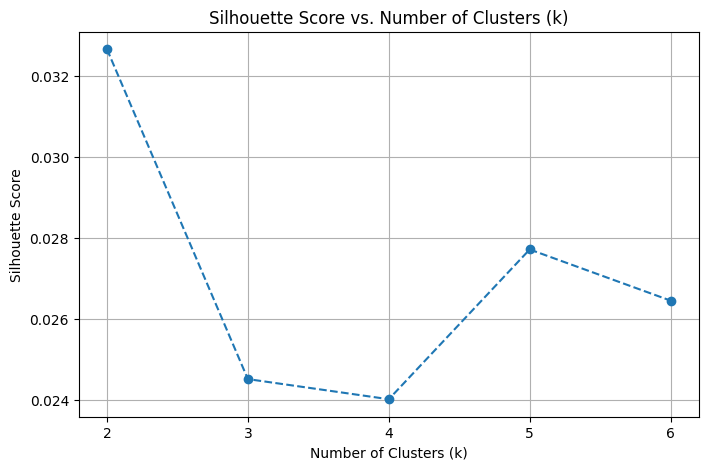

In [24]:
# visualize silhouette scores vs # of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Proceed with 3 clusters

In [26]:
# Extract embeddings from full df
X_all = np.vstack(df_news['EMBEDDINGS'].values)

# Apply KMeans with k=3
k = 3
kmeans_all = KMeans(n_clusters=k, random_state=42, n_init='auto')
df_news['CLUSTER'] = kmeans_all.fit_predict(X_all)
df_news[['TICKER', 'TITLE', 'CLUSTER']].sort_values('CLUSTER')

,TICKER,TITLE,CLUSTER
15,ABT,CMS covers cardiac ablation in ambulatory surg...,0
8,AOS,A. O. Smith's Leonard Valve Acquisition Offers...,0
491,CTAS,"Carvana initiated, AT upgraded: Wall Street's ...",0
513,CFG,Citizens Snags $800M California Duo In Ongoing...,0
510,C,Aramco selects Citigroup for oil storage termi...,0
...,...,...,...
3,ACN,Is Accenture Stock Underperforming the S&P 500?,2
11,MMM,"Beat the Market the Zacks Way: Goldman Sachs, ...",2
12,MMM,3 S&P 500 Stocks We’re Skeptical Of,2
1734,PAYC,3 Cash-Producing Stocks with Open Questions,2


# PCA components

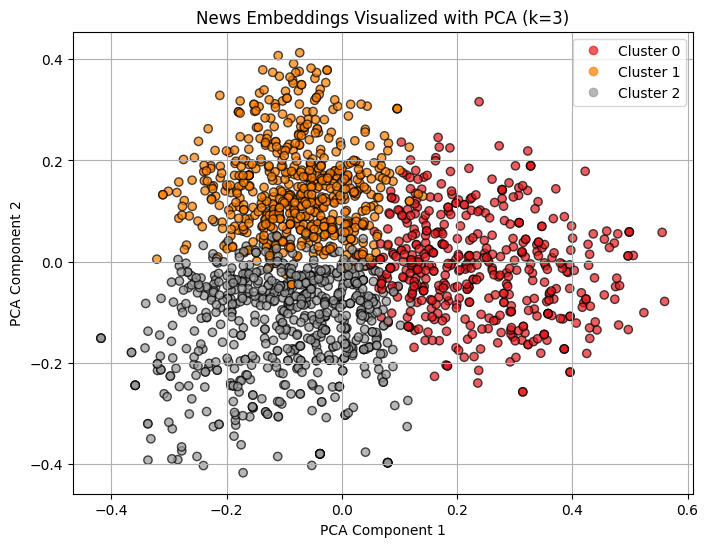

In [27]:
#X_all contains all the embeddings so we just reduce the dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

#extract the labels for a better visualization
labels = df_news['CLUSTER'].values

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', alpha=0.7, edgecolors='k')
plt.title("News Embeddings Visualized with PCA (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)

#legend
legend_labels = np.unique(labels)
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in legend_labels])

plt.show()

# Visualize clusters content 

In [28]:
pd.set_option('display.max_colwidth', None)

# Show the first N articles per cluster
N = 3

# Group by cluster and get head of each
for cluster_id, group in df_news.groupby('CLUSTER'):
    print(f"\n Cluster {cluster_id} — Top {N} articles:\n")
    display(group[['TICKER', 'TITLE', 'SUMMARY']].head(N))


 Cluster 0 — Top 3 articles:



,TICKER,TITLE,SUMMARY
1,ACN,Is Accenture's (ACN) Expanding AWS Partnership Reshaping Its Digital Transformation Growth Strategy?,"Accenture recently presented at the International Security Conference & Exposition in New York, showcasing its security solutions leadership with Jennifer President as a featured speaker. A central insight from this event is Accenture’s focus on expanding its digital transformation capabilities through collaboration with Amazon Web Services, reinforcing its core growth strategy. We'll explore how Accenture’s deepening AWS partnership shapes its investment narrative as analysts anticipate the..."
2,ACN,The AI Layoff Shock: McKinsey's Job Cuts Hint at a Much Bigger Storm Ahead,A quiet round of tech cuts could be the first sign of a deeper AI-driven reset across consulting and global banking.
8,AOS,"A. O. Smith's Leonard Valve Acquisition Offers Medium-Term Upside, Oppenheimer Says",A. O. Smith's (AOS) acquisition of water management technology firm Leonard Valve is a strategic fit



 Cluster 1 — Top 3 articles:



,TICKER,TITLE,SUMMARY
0,ACN,Does the Recent 2.8% Bump Signal a Turnaround for Accenture Stock?,"Wondering if Accenture stock is a bargain, overpriced, or somewhere in between? You are not alone. Plenty of investors are asking the same question right now. After seeing a 2.8% bump in the past week, Accenture is still down 28.9% year-to-date and has slid 30.1% over the last 12 months. This raises questions about whether the recent move signals a turnaround or just another pause in the downtrend. Recent headlines have highlighted Accenture's continued expansion in AI-driven services and..."
4,ACN,Accenture (ACN) Stock Sinks As Market Gains: Here's Why,"Accenture (ACN) closed at $243.62 in the latest trading session, marking a -3.27% move from the prior day."
9,AOS,"A. O. Smith (AOS): Assessing Valuation After Strong Earnings, Dividend Hike, and Strategic Buybacks","A. O. Smith (AOS) had an eventful quarter, announcing a 15% jump in earnings per share for the third quarter and a 6% rise in its quarterly dividend. Management’s commentary showed confidence in ongoing acquisition efforts and capital return strategy, which likely drew attention from investors. See our latest analysis for A. O. Smith. Despite a strong quarter and steady investor-friendly moves like increased buybacks and a higher dividend, A. O. Smith’s shares have struggled to gain momentum..."



 Cluster 2 — Top 3 articles:



,TICKER,TITLE,SUMMARY
3,ACN,Is Accenture Stock Underperforming the S&P 500?,"While Accenture has lagged behind the S&P 500 Index over the past year, analysts are moderately optimistic about the stock’s prospects."
5,AOS,A. O. Smith Stock Outlook: Is Wall Street Bullish or Bearish?,"Although A. O. Smith has considerably underperformed the broader market over the past 52 weeks, Wall Street analysts maintain a moderately optimistic outlook about the stock’s prospects."
6,AOS,"A. O. Smith Corporation's (NYSE:AOS) recent 4.2% pullback adds to one-year year losses, institutional owners may take drastic measures","Key Insights Given the large stake in the stock by institutions, A. O. Smith's stock price might be vulnerable to their..."


# Conclusions for this analysis:

News coverage is uneven: Not all stocks have news at all times.
Embeddings may not capture financial nuance or factual correctness.
No temporal modeling — the pipeline ignores when the news was released and how recent it is.
No sentiment or price impact assessment is done, which are critical in finance.
Embedding models are not fine-tuned on financial data, which may lead to shallow understanding of domain-specific terms.

So i run the code several times on different days, and not all the tickers have news at all times, this also applies for the frequency, also this is a analysis for events that already or will happen soon (if a ceo tells information on a conference about a movement on the close future like speculative)

For future work I would:
- Add sentiment as an extra feature vector (or embed it directly).
- Filter or cluster separately by categories (e.g., legal, earnings).
- Group by author or source credibility to assess bias or quality.
- Use metadata to weight or filter certain types of news in training.

also classifying and training a model for a specific type of news would have a more accurate analysis and prediction.